# Temperature regression tensorflow project

Global warming is the ongoing rise of the average temperature of the Earth's climate system and has been demonstrated by direct temperature measurements and by measurements of various effects of the warming.

This is dataset of the temperature of major cities in the world. Thanks to University of Dayton, the dataset is available as separate txt files for each city here. The data is available for research and non-commercial purposes only.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm

In [2]:
df=pd.read_csv("city_temperature.csv")
df.head()

/home/mattdmv/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [4]:
#Calculating null values
df.isnull().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [5]:
#we have over 1.4 milion none values in "State" column so we will drop it
df2=df.drop(["State"],axis=1)
df2.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In this project we will try to predict  temperature only in Europe. So first we will transfrom average temperature into Celsius.

In [6]:
#Making dataframe with only Europe region
df3=df2[df2["Region"]=="Europe"]
df3.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
623377,Europe,Albania,Tirana,1,1,1995,-99.0
623378,Europe,Albania,Tirana,1,2,1995,-99.0
623379,Europe,Albania,Tirana,1,3,1995,-99.0
623380,Europe,Albania,Tirana,1,4,1995,-99.0
623381,Europe,Albania,Tirana,1,5,1995,-99.0


We will drop rows with temperature less then 0F.

In [7]:
df3.shape

(381990, 7)

In [8]:
df4=df3[df3["AvgTemperature"]>=0]
df4.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
624218,Europe,Albania,Tirana,4,21,1997,55.4
624222,Europe,Albania,Tirana,4,25,1997,56.8
624223,Europe,Albania,Tirana,4,26,1997,61.5
624224,Europe,Albania,Tirana,4,27,1997,60.8
624225,Europe,Albania,Tirana,4,28,1997,57.2


In [9]:
df4.shape

(368339, 7)

In [10]:
df5=df4.copy()

In [11]:
# Creating new column with temperature in Celsius
df5["Temperature"]=round((df4["AvgTemperature"]-32)/1.8)
df5.head()

,Region,Country,City,Month,Day,Year,AvgTemperature,Temperature
624218,Europe,Albania,Tirana,4,21,1997,55.4,13.0
624222,Europe,Albania,Tirana,4,25,1997,56.8,14.0
624223,Europe,Albania,Tirana,4,26,1997,61.5,16.0
624224,Europe,Albania,Tirana,4,27,1997,60.8,16.0
624225,Europe,Albania,Tirana,4,28,1997,57.2,14.0


## Exploring data

In [12]:
df5["Country"].unique()

array(['Albania', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Georgia', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Latvia', 'Macedonia', 'The Netherlands', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russia', 'Serbia-Montenegro',
       'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom', 'Yugoslavia'], dtype=object)

In [13]:
# Average temperature by countries
average_temp=df5.groupby('Country')["Temperature"].mean()
average_temp

Country
Albania              16.182008
Austria              10.815368
Belarus               7.567441
Belgium              10.835787
Bulgaria             10.890204
Croatia              12.450017
Cyprus               19.983157
Czech Republic        8.934705
Denmark               8.551418
Finland               6.190752
France               12.984824
Georgia              13.519386
Germany               9.966308
Greece               18.461102
Hungary              10.870304
Iceland               5.288838
Ireland               9.736495
Italy                14.289048
Latvia                7.531796
Macedonia            12.627698
Norway                5.532307
Poland                9.060596
Portugal             17.009217
Romania              11.570640
Russia                7.939497
Serbia-Montenegro    10.138324
Slovakia             11.085120
Spain                15.526342
Sweden                7.561647
Switzerland          10.250461
The Netherlands      10.714270
Ukraine               9.041346


In [14]:
df5["Year"].value_counts()

2000    15750
2001    15645
2002    15466
1999    15328
1997    15304
2003    15247
1998    15225
2004    15081
2005    15034
1995    15000
1996    14921
2008    14846
2011    14682
2006    14632
2007    14417
2010    14394
2009    14358
2012    13658
2018    13601
2019    13542
2013    13497
2015    13464
2017    13462
2014    13458
2016    13386
2020     4941
Name: Year, dtype: int64

We can see that we have significant less temperature measures in 2020 so because of that we will drop those rows when we will preparing dataset for model.

In [15]:
df5["Year"].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 1995, 1996])

In [16]:
# Average temperature by year
average_temp=df5.groupby('Year')["Temperature"].mean()
average_temp

Year
1995    10.886200
1996    10.169761
1997    10.824098
1998    11.053005
1999    11.268072
2000    11.685143
2001    11.118760
2002    11.430493
2003    11.287598
2004    10.991314
2005    10.979181
2006    11.275560
2007    11.627038
2008    11.379025
2009    11.331940
2010    10.383007
2011    11.324343
2012    10.875531
2013    10.677854
2014    11.550899
2015    11.455957
2016    11.139399
2017    11.158669
2018    11.583192
2019    11.594742
2020     7.333738
Name: Temperature, dtype: float64

In [17]:
df5["Day"].describe()

count    368339.000000
mean         15.704677
std           8.798720
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: Day, dtype: float64

In [18]:
df5["Month"].describe()

count    368339.000000
mean          6.463437
std           3.453168
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: Month, dtype: float64

In [19]:
df5["Temperature"].describe()

count    368339.000000
mean         11.108870
std           8.381672
min         -18.000000
25%           5.000000
50%          12.000000
75%          17.000000
max          39.000000
Name: Temperature, dtype: float64

## Outliers search

In [20]:
df5.shape

(368339, 8)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b5976bcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b597023d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b5976b970>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b59702a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b59702df0>],
 'means': []}

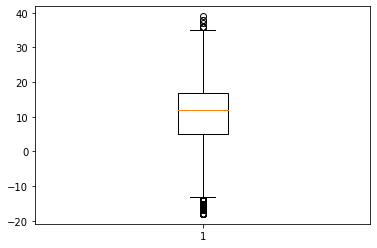

In [21]:
plt.boxplot(df5['Temperature'])

In [22]:
# Upper outlier threshold  Q3 + 1.5(IQR)
max_threshold=17 + 1.5*(17 - 5)
max_threshold

35.0

In [23]:
#how many outliers do we have (values greater than max_threshold)
outliers=df5[df5.Temperature>max_threshold]
outliers.shape

(9, 8)

In [24]:
# Removing outliers
df6=df5[df5.Temperature<max_threshold]
# recalculate summary statistics
df6['Temperature'].describe()

count    368316.000000
mean         11.107332
std           8.379669
min         -18.000000
25%           5.000000
50%          12.000000
75%          17.000000
max          34.000000
Name: Temperature, dtype: float64

In [25]:
#Lower Outlier Threshold = Q1 – 1.5(IQR)
lower_threshold= 5 - 1.5*(17-5)
lower_threshold

-13.0

In [26]:
# Removing outliers
df7=df6[df6.Temperature>lower_threshold]
# recaculate summary statistics
df7['Temperature'].describe()

count    366984.00000
mean         11.20057
std           8.24999
min         -12.00000
25%           5.00000
50%          12.00000
75%          17.00000
max          34.00000
Name: Temperature, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b5965c8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b5965cfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b5965c580>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b596686a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b59668a00>],
 'means': []}

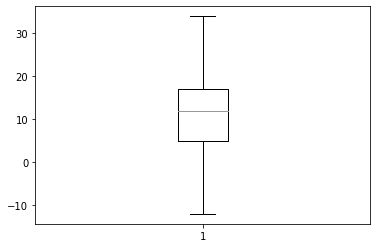

In [27]:
plt.boxplot(df7['Temperature'])

In [28]:
df7.shape

(366984, 8)

## Data visualization

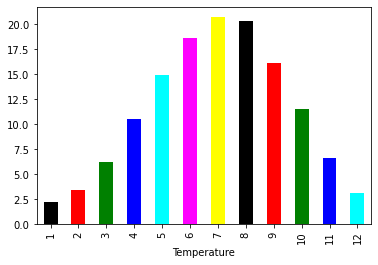

In [29]:
#Bar plot of  average temp per month 
df7.groupby("Month")["Temperature"].mean().plot.bar(color=['black', 'red', 'green', 'blue', 'cyan',"magenta","yellow"])
plt.xlabel("Temperature")
plt.show()

<AxesSubplot:xlabel='Country'>

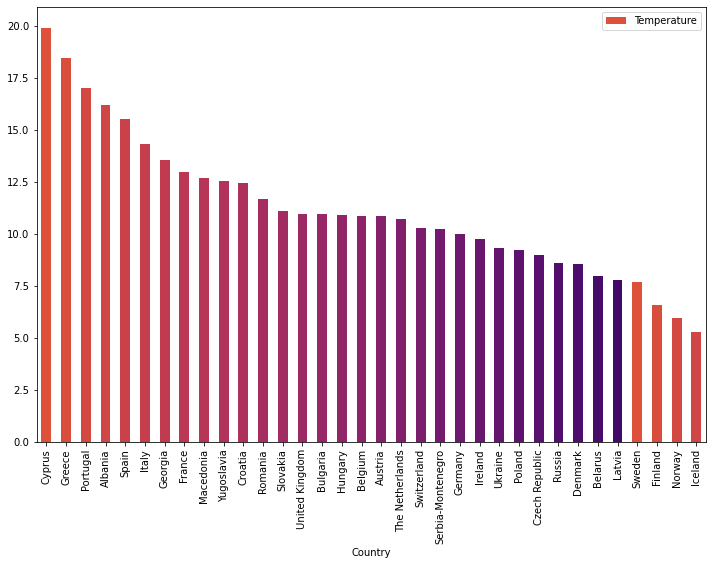

In [30]:
# Average temperature by countries in Europe
country=df7.groupby("Country")["Temperature"].mean().reset_index("Country")
color = cm.inferno_r(np.linspace(.4, .8, 30))
country=country.sort_values("Temperature" , ascending=[False])
country.plot.bar(x="Country", y='Temperature', color=color , figsize=(12,8))

In [31]:
#United Kingdom in december dataframe
uk=df7[(df7["Country"]=="United Kingdom")&(df7["Month"]==12)]

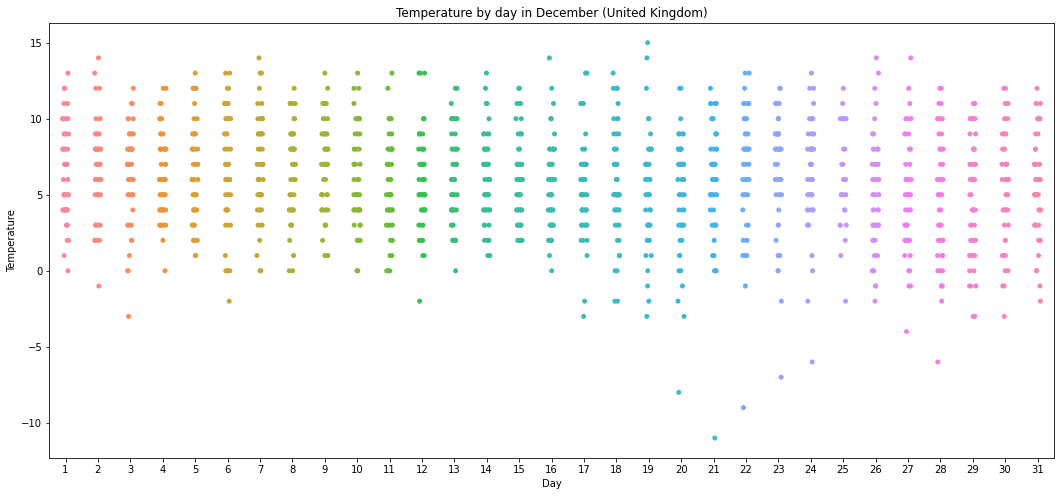

In [32]:
plt.figure(figsize=(18,8))
sns.stripplot(x="Day",y="Temperature",data=uk)
plt.title("Temperature by day in December (United Kingdom)")
plt.show()

In [33]:
croatia=df7[df7["Country"]=="Croatia"]
cro_20=croatia[croatia["Year"]==2000]
cro_05=croatia[croatia["Year"]==2005]
cro_10=croatia[croatia["Year"]==2010]
cro_15=croatia[croatia["Year"]==2015]

months=[1,2,3,4,5,6,7,8,9,10,11,12]


temp_20=cro_20.groupby("Month")["Temperature"].mean()
temp_05=cro_05.groupby("Month")["Temperature"].mean()
temp_10=cro_10.groupby("Month")["Temperature"].mean()
temp_15=cro_15.groupby("Month")["Temperature"].mean()

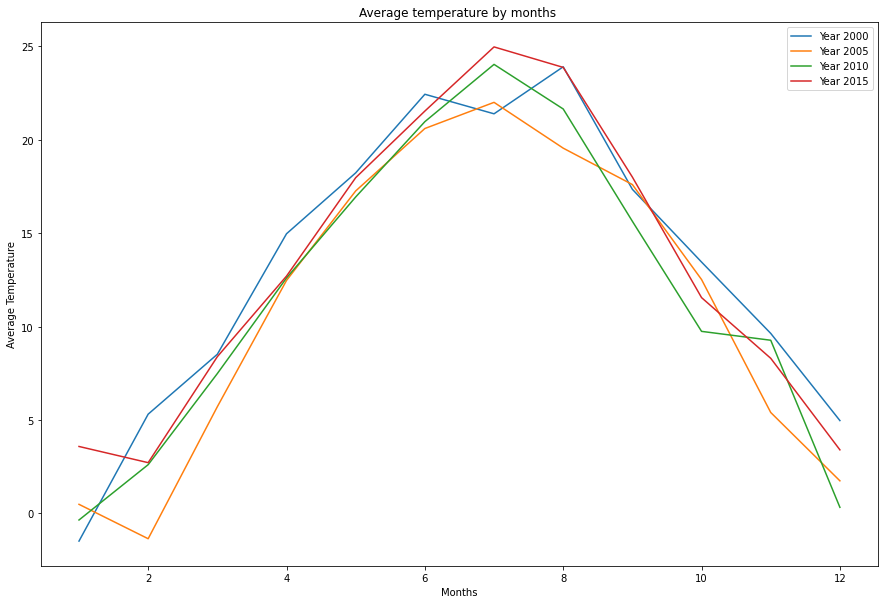

In [34]:
plt.figure(figsize=(15,10))
plt.xlabel("Months")
plt.ylabel("Average Temperature")
plt.title("Average temperature by months ")
plt.plot(months,temp_20, label="Year 2000")
plt.plot(months,temp_05, label="Year 2005")
plt.plot(months,temp_10,label="Year 2010")
plt.plot(months,temp_15,label="Year 2015")
plt.legend()


## Preparing dataset for model

In [72]:
df7.head()

,Region,Country,City,Month,Day,Year,AvgTemperature,Temperature
624218,Europe,Albania,Tirana,4,21,1997,55.4,13.0
624222,Europe,Albania,Tirana,4,25,1997,56.8,14.0
624223,Europe,Albania,Tirana,4,26,1997,61.5,16.0
624224,Europe,Albania,Tirana,4,27,1997,60.8,16.0
624225,Europe,Albania,Tirana,4,28,1997,57.2,14.0


In [74]:
#droping useless columns
df8=df7.drop(["AvgTemperature","Region"],axis=1)
df8.head()

,Country,City,Month,Day,Year,Temperature
624218,Albania,Tirana,4,21,1997,13.0
624222,Albania,Tirana,4,25,1997,14.0
624223,Albania,Tirana,4,26,1997,16.0
624224,Albania,Tirana,4,27,1997,16.0
624225,Albania,Tirana,4,28,1997,14.0


In [75]:
# define a function to discover columns with categorical varibales

def discover_categorical_columns(df):
    """
    This function takes dataframe as an input, goes through columns in a dataframe to check if column is of an object type.
    If the colunm is of an object type it means column contains categorical variables. Function than prints all unique 
    categorical values of a column
    
    Args: 
        df (pd.DataFrame) - only requried argument for the function
        
    Returns:
        Prints unique categorical values for object type columns.
    """
    for column in df:
        if df[column].dtype=='object':
            print('{} : {}'.format(column, df[column].unique()))

In [76]:
discover_categorical_columns(df8)

Country : ['Albania' 'Austria' 'Belarus' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Georgia'
 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Latvia' 'Macedonia'
 'The Netherlands' 'Norway' 'Poland' 'Portugal' 'Romania' 'Russia'
 'Serbia-Montenegro' 'Slovakia' 'Spain' 'Sweden' 'Switzerland' 'Ukraine'
 'United Kingdom' 'Yugoslavia']
City : ['Tirana' 'Vienna' 'Minsk' 'Brussels' 'Sofia' 'Zagreb' 'Nicosia' 'Prague'
 'Copenhagen' 'Helsinki' 'Paris' 'Bordeaux' 'Bonn' 'Frankfurt' 'Hamburg'
 'Munich' 'Tbilisi' 'Athens' 'Budapest' 'Reykjavik' 'Dublin' 'Milan'
 'Rome' 'Riga' 'Skopje' 'Amsterdam' 'Oslo' 'Warsaw' 'Lisbon' 'Bucharest'
 'Moscow' 'Yerevan' 'Pristina' 'Bratislava' 'Barcelona' 'Bilbao' 'Madrid'
 'Stockholm' 'Bern' 'Geneva' 'Zurich' 'Kiev' 'Belfast' 'London' 'Belgrade']


In [77]:
#function for creating dummy column
def create_dummies(df,column_name):
    dummies=pd.get_dummies(df[column_name],prefix=column_name)
    df=pd.concat([df,dummies],axis=1)
    return df

In [78]:
#dummy columns
df9=create_dummies(df8,"Country")
df10=df9.drop(["Country"],axis=1)

df11=create_dummies(df10,"City")
df12=df11.drop(["City"],axis=1)


In [80]:
df12.head()

,Month,Day,Year,Temperature,Country_Albania,Country_Austria,Country_Belarus,Country_Belgium,Country_Bulgaria,Country_Croatia,...,City_Skopje,City_Sofia,City_Stockholm,City_Tbilisi,City_Tirana,City_Vienna,City_Warsaw,City_Yerevan,City_Zagreb,City_Zurich
624218,4,21,1997,13.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
624222,4,25,1997,14.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
624223,4,26,1997,16.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
624224,4,27,1997,16.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
624225,4,28,1997,14.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [133]:
#droping rows with 2020 temperature measure
df13=df12[df12["Year"]!=2020]
df13["Year"].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 1995, 1996])

In [134]:
df13.shape

(362043, 83)

## Spliting dataset

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
# Defining features and  target column< 
X = df13.drop(columns='Temperature', axis ='columns')
y = df13.Temperature

In [97]:
#Splitting our data on train and test
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,random_state=10)

## Scaling data

In [98]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler
scaler=MinMaxScaler()

In [99]:
train_X = scaler.fit_transform(train_X)
test_X= scaler.transform(test_X)

In [109]:
# import tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [101]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [104]:
model.fit(x=train_X, y = train_y,validation_data=(test_X,test_y),batch_size=200,epochs=50)

Epoch 1/50
1449/1449 [==============================] - 10s 7ms/step - loss: 12.1502 - val_loss: 11.8440
Epoch 2/50
1449/1449 [==============================] - 10s 7ms/step - loss: 11.8901 - val_loss: 11.6932
Epoch 3/50
1449/1449 [==============================] - 10s 7ms/step - loss: 11.7626 - val_loss: 11.6303
Epoch 4/50
1449/1449 [==============================] - 9s 7ms/step - loss: 11.7303 - val_loss: 11.5843
Epoch 5/50
1449/1449 [==============================] - 10s 7ms/step - loss: 11.7072 - val_loss: 11.4935
Epoch 6/50
1449/1449 [==============================] - 9s 6ms/step - loss: 11.6595 - val_loss: 11.5584
Epoch 7/50
1449/1449 [==============================] - 10s 7ms/step - loss: 11.6515 - val_loss: 11.6849
Epoch 8/50
1449/1449 [==============================] - 11s 8ms/step - loss: 11.6211 - val_loss: 11.5487
Epoch 9/50
1449/1449 [==============================] - 10s 7ms/step - loss: 11.5990 - val_loss: 11.5576
Epoch 10/50
1449/1449 [==============================] - 

In [110]:
# evaluate the model on the test set
model.evaluate(test_X, test_y)

2263/2263 [==============================] - 7s 3ms/step - loss: 11.2524


11.252445220947266

<AxesSubplot:>

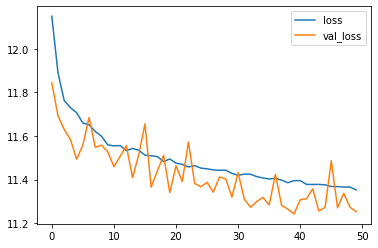

In [105]:
#history attribute of training loss values at successive epochs, as well as validation loss values
lossData = pd.DataFrame(model.history.history)
lossData.plot()

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [108]:
#Calculating RMSE(root mean square error)
pred= model.predict(test_X)
print(np.sqrt(mean_squared_error(test_y,pred)))

3.3544660783417393


The lower  RMSE is,the better results are. We ve got pretty good results.